This notebook here will be to try to get a good idea of whether I should use the MODIS or VIIRS data. I originally started out with a download of the [MODIS data](http://firemapper.sc.egov.usda.gov/gisdata.php) because it offered more data (it goes back to 2001, where VIIRS goes back to 2012). However, the VIIRS data is at a higher resolution, and in that sense it's at least worth taking a look at. 

I'm going to start off by looking at some basic statistics from each of the data sets for a given year - # of obs., # of fires, variable distribution. Then, I'll do some geographical plotting to compare how the distribution of fire/non-fire observations differs across the two data sets. A number of these functions are pulled from the `map_exploration.ipynb` notebook also stored in this folder. Normally, I would throw these into a folder in the name of DRY, but right now I'm doing EDA and I'm not too worried about it. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from dsfuncs.dist_plotting import plot_var_dist, plot_binary_response
%matplotlib inline

In [2]:
def read_df(year, modis=True): 
    """This function will read in a year of data, and add a month column. 
    
    Args: 
        year: str
        modis: bool
            Whether to use the modis or viirs data for plotting. 
        
    Return:
        Pandas DataFrame
    """
    if modis: 
        output_df = pd.read_csv('../../../data/csvs/detected_fires_MODIS_' + str(year) + '.csv', 
                                parse_dates=['date'], true_values=['t'], false_values=['f'])
    else: 
         output_df = pd.read_csv('../../../data/csvs/detected_fires_VIIRS_' + str(year) + '.csv', 
                                parse_dates=['date'], true_values=['t'], false_values=['f'])
    output_df['month'] = output_df.date.apply(lambda dt: dt.strftime('%B'))
    output_df.dropna(subset=['region_name'], inplace=True) # These will be obs. in Canada. 
    return output_df

def calc_minor_stats(df): 
    """Calculate some minor, fixed stats for the inputted DataFrame. 
    
    Return the number of observations, the number of fires, and the 
    percentage of obs. that are a fire from the inputted DataFrame. 
    
    Args: 
        df: Pandas DataFrame
            Inputted DataFrame to grab some minor stats from. 
    
    Return: int (n_obs), int(n_fires), float (pct_fires)
    """
    
    n_obs = df.shape[0]
    n_fires = df.query('fire_bool == True').shape[0]
    pct_fires = float(n_fires) / n_obs
    
    return n_obs, n_fires, pct_fires

def return_fires(df): 
    """Segment out fires versus non-fires observations and return them. 
    
    Args: 
        df: Pandas DataFrame
        
    Return: Pandas DataFrame, Pandas DataFrame 
    """
    
    fires = df.query('fire_bool == 0')
    non_fires = df.query('fire_bool == 1')
    
    return fires, non_fires

def plot_modis_viirs(year): 
    """Plot the distributions of variables for modis and viirs. 
    
    Args: 
        year: int
    """
    
    continous_vars = ('lat', 'long', 'gmt', 'conf', 'county_aland', 'county_awater')
    categorical_vars = ('urban_areas_bool', 'src', 'sat_src')
    modis_df = read_df(year)
    viirs_df = read_df(year, modis=False)
    print 'Year: {}'.format(year)
    print '-' * 50
    n_modis_obs, n_modis_fires, pct_modis_fires = calc_minor_stats(modis_df)
    modis_fires, modis_non_fires = return_fires(modis_df)
    print 'Modis - Num. obs: {}, Num. fires: {}, Pct. fires: {}'.format(n_modis_obs, n_modis_fires, pct_modis_fires)
    n_viirs_obs, n_viirs_fires, pct_viirs_fires = calc_minor_stats(viirs_df)
    viirs_fires, viirs_non_fires = return_fires(viirs_df)
    print 'Viirs - Num. obs: {}, Num. fires: {}, Pct. fires: {}'.format(n_viirs_obs, n_viirs_fires, pct_viirs_fires)
    for var in continous_vars: 
        print 'Variable: {} : Fires, then non-fires... Modis, then VIIRS'.format(var)
        f, axes = plt.subplots(1, 8, figsize=(20, 5))
        plot_var_dist(modis_fires[var], categorical=False, ax=axes[0:2], show=False, outliers=False)
        plot_var_dist(modis_non_fires[var], categorical=False, ax=axes[2:4], show=False, outliers=False)
        plot_var_dist(viirs_fires[var], categorical=False, ax=axes[4:6], show=False, outliers=False)
        plot_var_dist(viirs_non_fires[var], categorical=False, ax=axes[6:8], show=False, outliers=False)
        plt.show()  
    for var in categorical_vars: 
        print 'Variable: {} : Fires, then non-fires... Modis, then VIIRS'.format(var)
        f, axes = plt.subplots(1, 4, figsize=(20, 5))
        plot_var_dist(modis_fires[var], categorical=True, ax=axes[0], show=False, outliers=False)
        plot_var_dist(modis_non_fires[var], categorical=True, ax=axes[1], show=False, outliers=False)
        plot_var_dist(viirs_fires[var], categorical=True, ax=axes[2], show=False, outliers=False)
        plot_var_dist(viirs_non_fires[var], categorical=True, ax=axes[3], show=False, outliers=False)
        plt.show()  

Year: 2012
--------------------------------------------------
Modis - Num. obs: 247286, Num. fires: 59731, Pct. fires: 0.241546225828
Viirs - Num. obs: 27383, Num. fires: 3433, Pct. fires: 0.125369754957
Variable: lat : Fires, then non-fires... Modis, then VIIRS


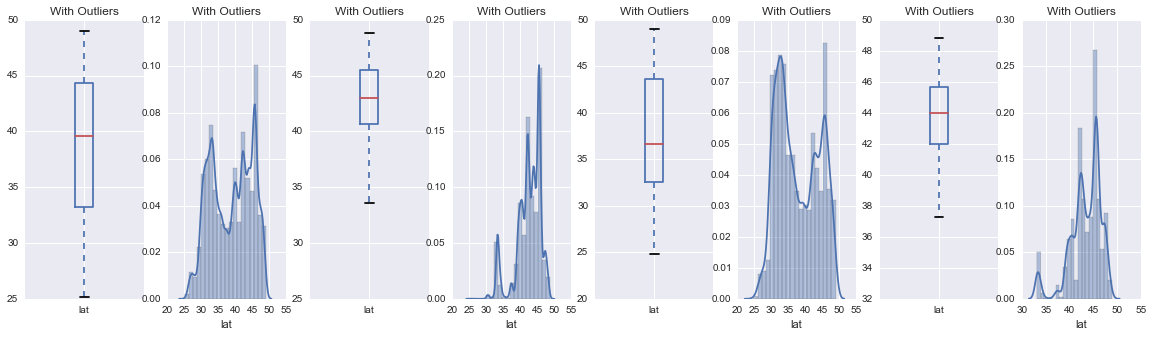

Variable: long : Fires, then non-fires... Modis, then VIIRS


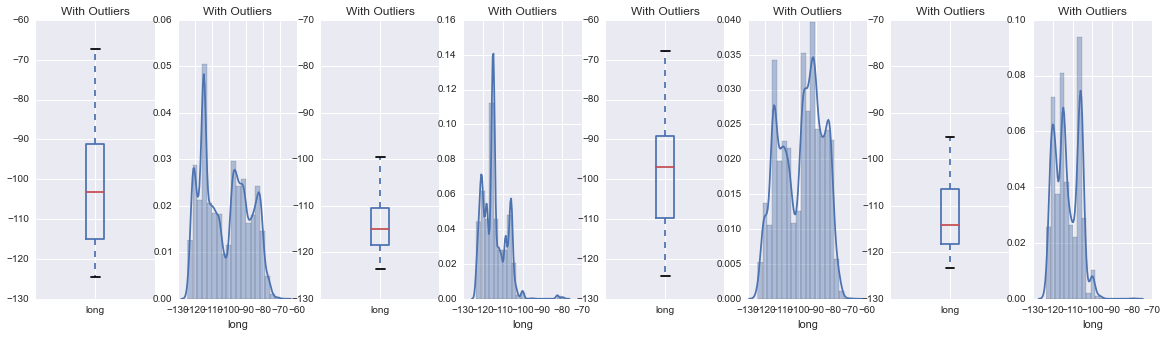

Variable: gmt : Fires, then non-fires... Modis, then VIIRS


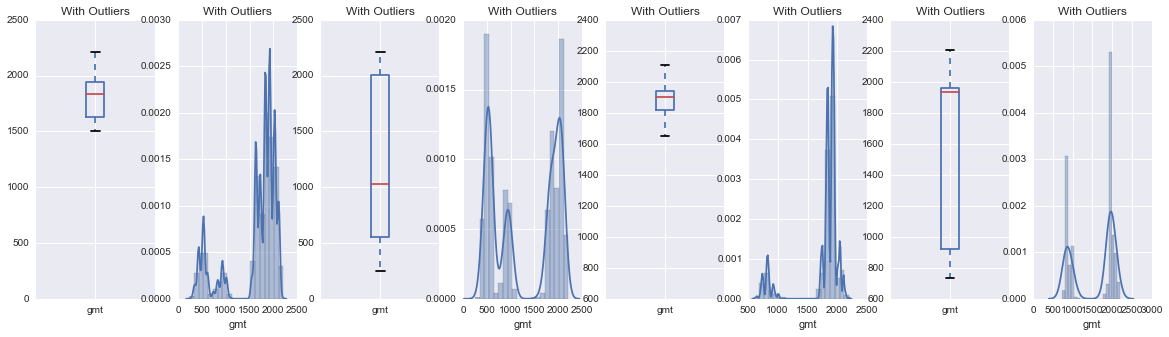

Variable: conf : Fires, then non-fires... Modis, then VIIRS


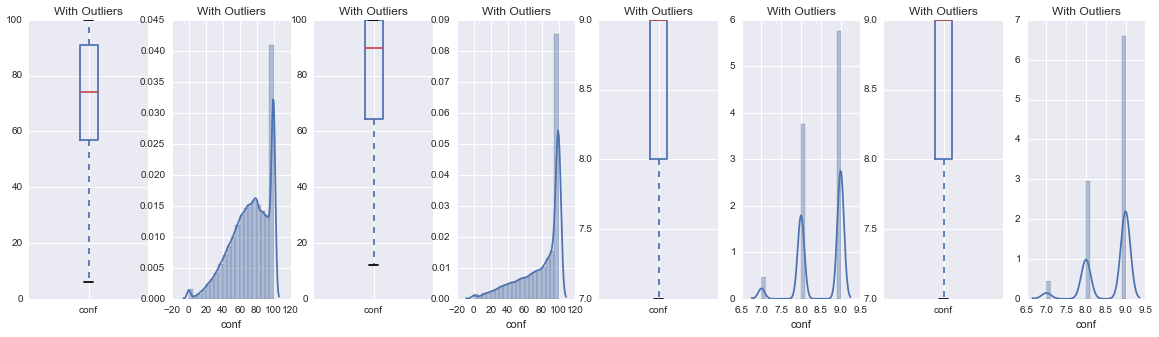

Variable: county_aland : Fires, then non-fires... Modis, then VIIRS


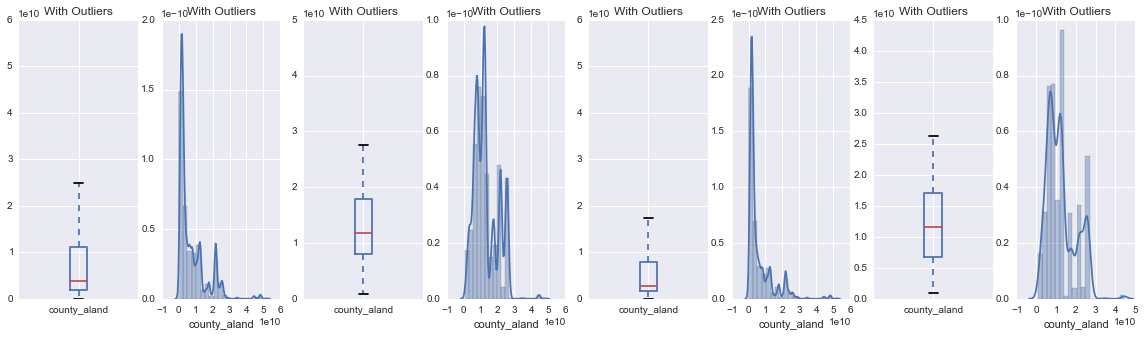

Variable: county_awater : Fires, then non-fires... Modis, then VIIRS


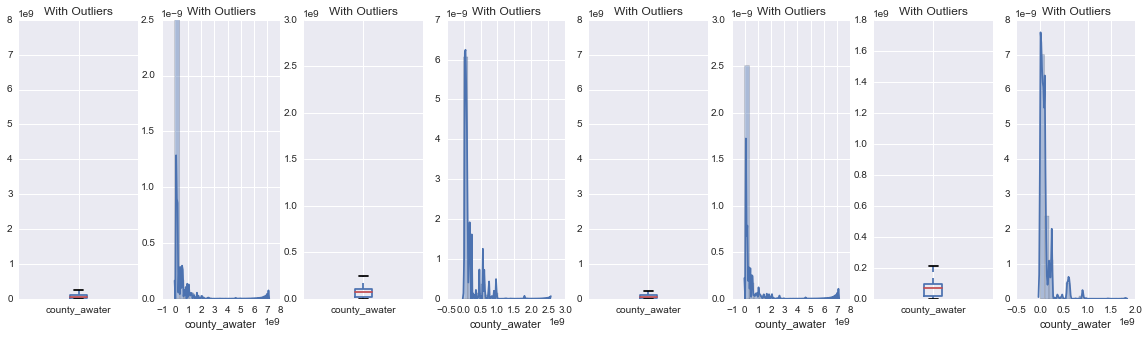

Variable: urban_areas_bool : Fires, then non-fires... Modis, then VIIRS


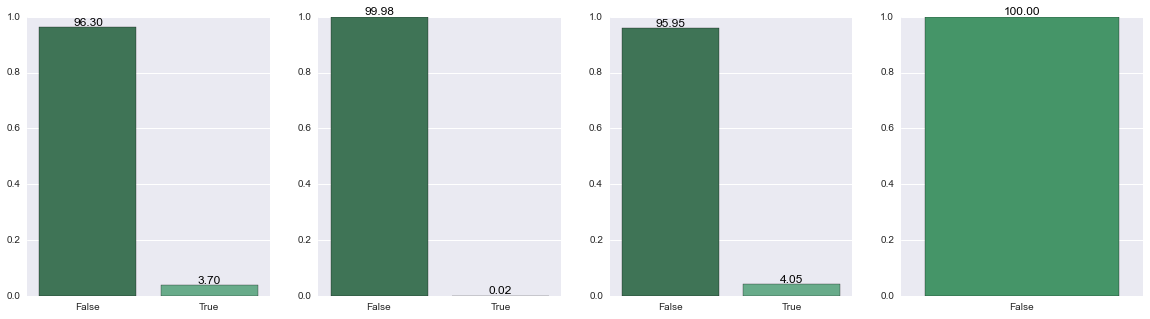

Variable: src : Fires, then non-fires... Modis, then VIIRS


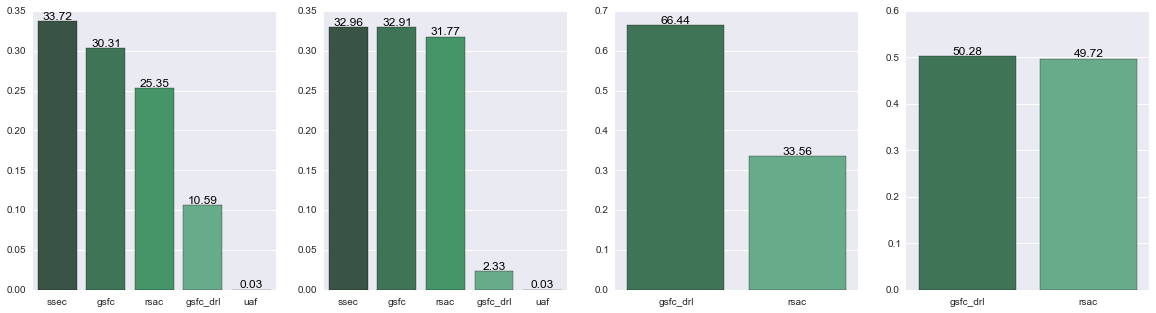

Variable: sat_src : Fires, then non-fires... Modis, then VIIRS


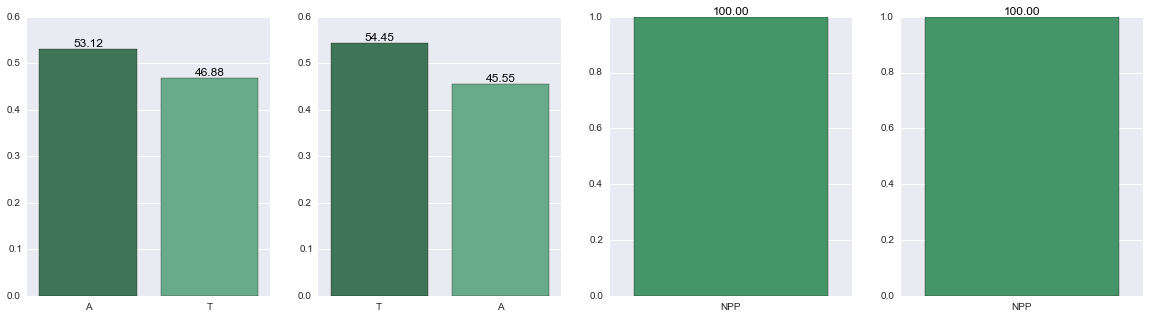

In [3]:
plot_modis_viirs(2012)

Year: 2013
--------------------------------------------------
Modis - Num. obs: 179295, Num. fires: 26997, Pct. fires: 0.150573077888
Viirs - Num. obs: 40770, Num. fires: 4968, Pct. fires: 0.121854304636
Variable: lat : Fires, then non-fires... Modis, then VIIRS


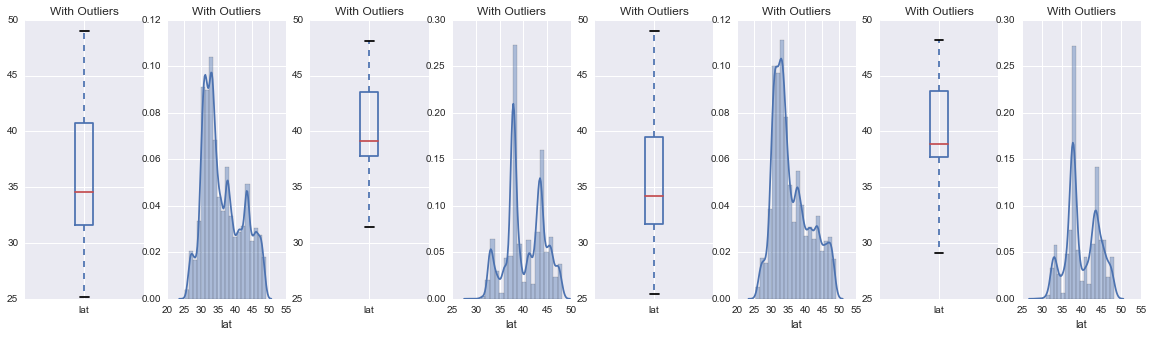

Variable: long : Fires, then non-fires... Modis, then VIIRS


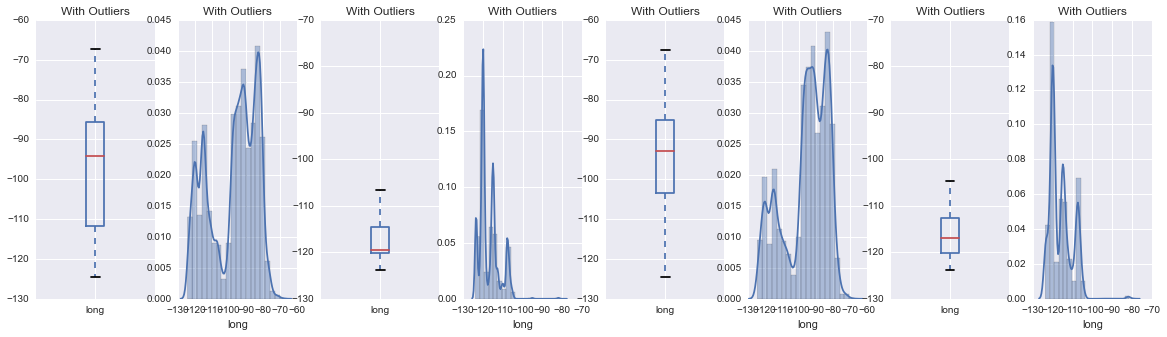

Variable: gmt : Fires, then non-fires... Modis, then VIIRS


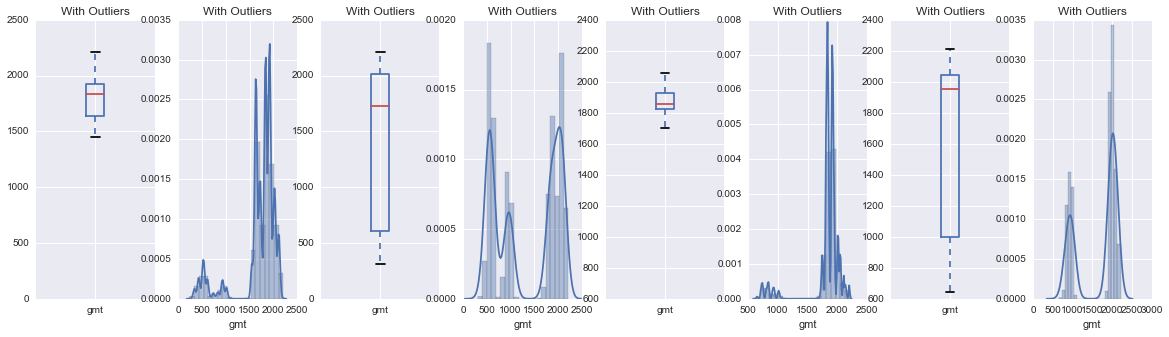

Variable: conf : Fires, then non-fires... Modis, then VIIRS


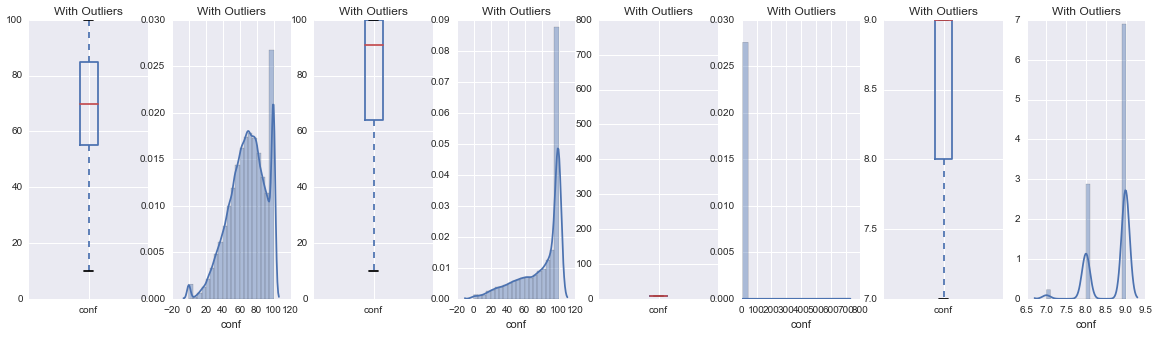

Variable: county_aland : Fires, then non-fires... Modis, then VIIRS


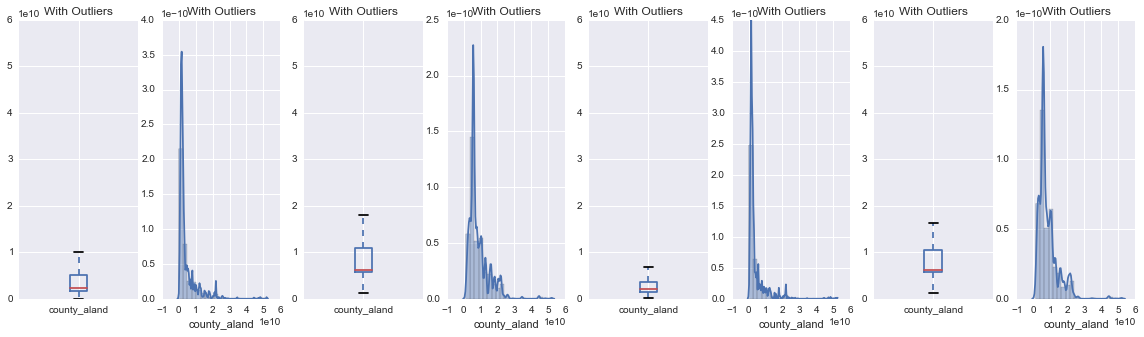

Variable: county_awater : Fires, then non-fires... Modis, then VIIRS


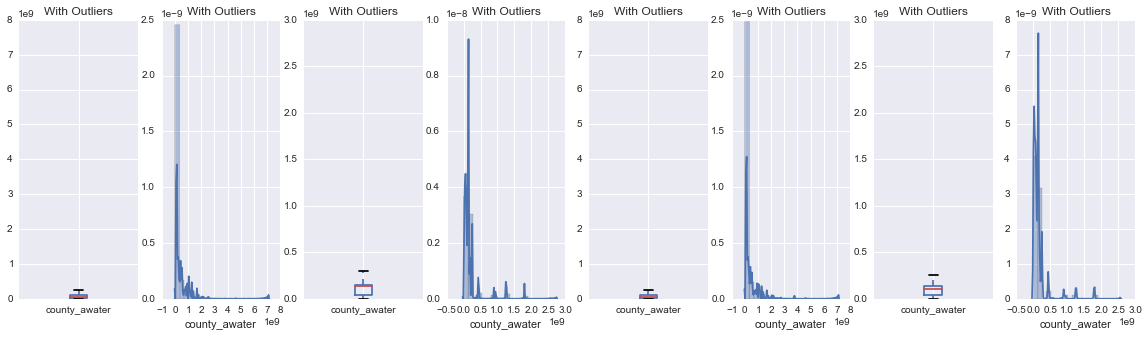

Variable: urban_areas_bool : Fires, then non-fires... Modis, then VIIRS


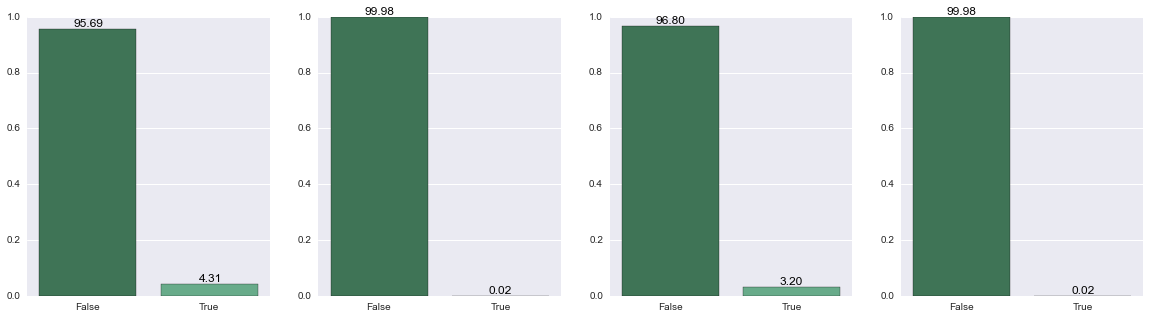

Variable: src : Fires, then non-fires... Modis, then VIIRS


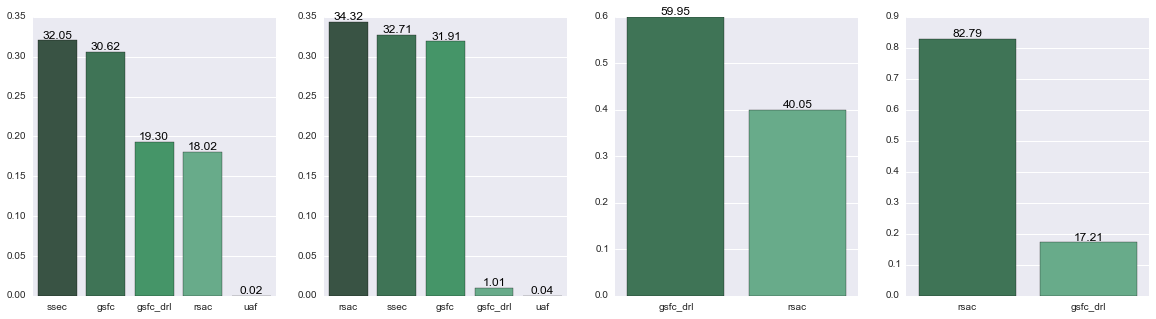

Variable: sat_src : Fires, then non-fires... Modis, then VIIRS


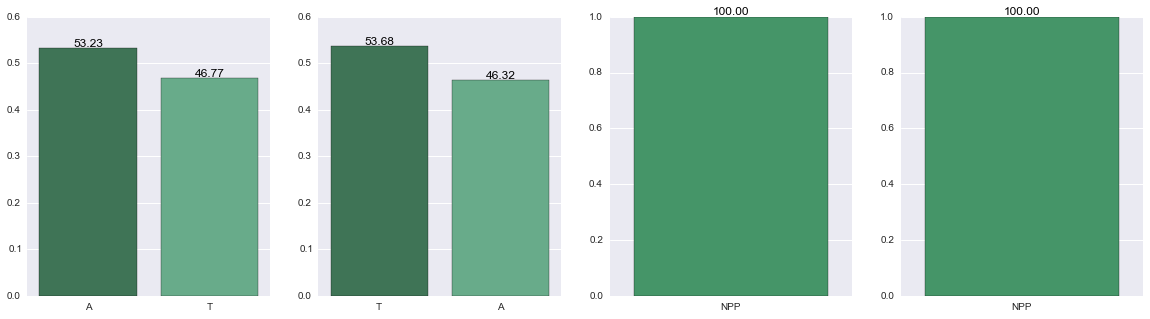

In [4]:
plot_modis_viirs(2013)

Year: 2014
--------------------------------------------------
Modis - Num. obs: 224904, Num. fires: 23932, Pct. fires: 0.106409845979
Viirs - Num. obs: 103035, Num. fires: 6083, Pct. fires: 0.059038190906
Variable: lat : Fires, then non-fires... Modis, then VIIRS


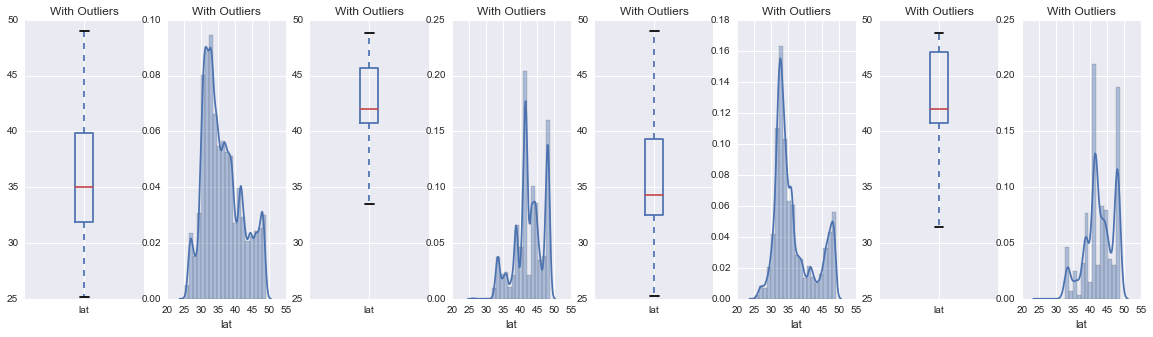

Variable: long : Fires, then non-fires... Modis, then VIIRS


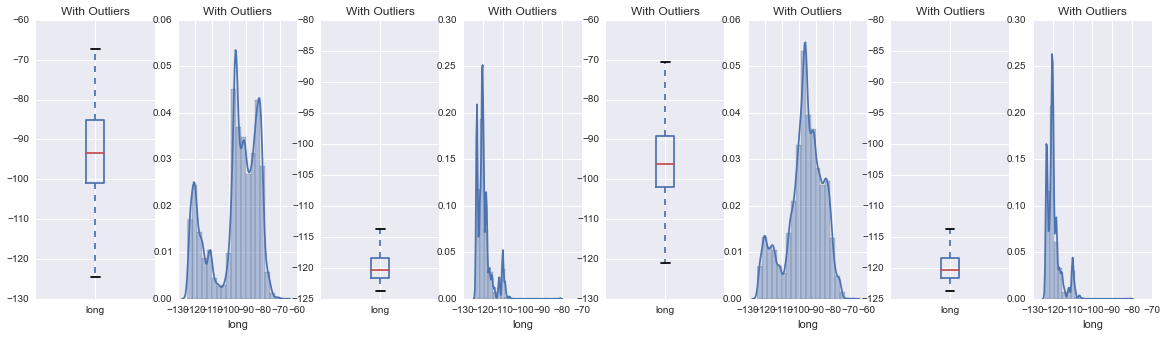

Variable: gmt : Fires, then non-fires... Modis, then VIIRS


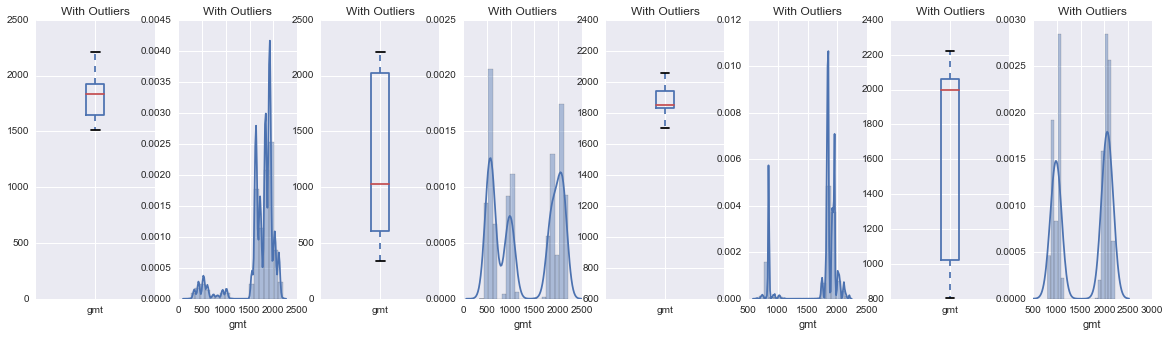

Variable: conf : Fires, then non-fires... Modis, then VIIRS


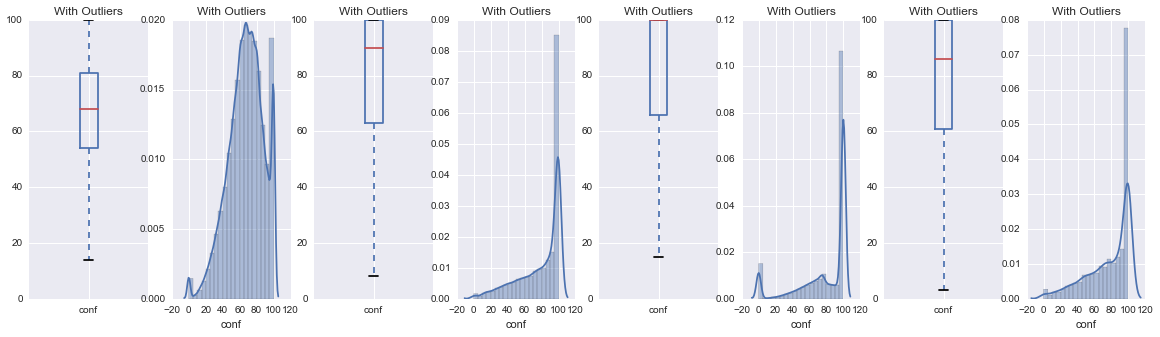

Variable: county_aland : Fires, then non-fires... Modis, then VIIRS


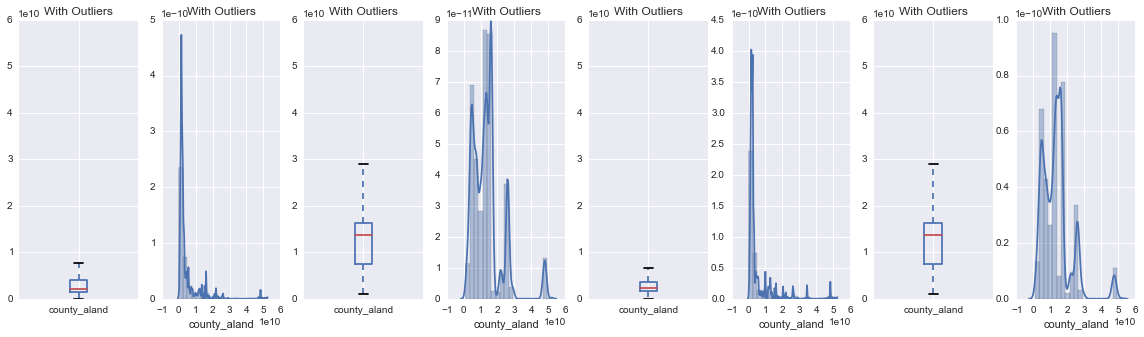

Variable: county_awater : Fires, then non-fires... Modis, then VIIRS


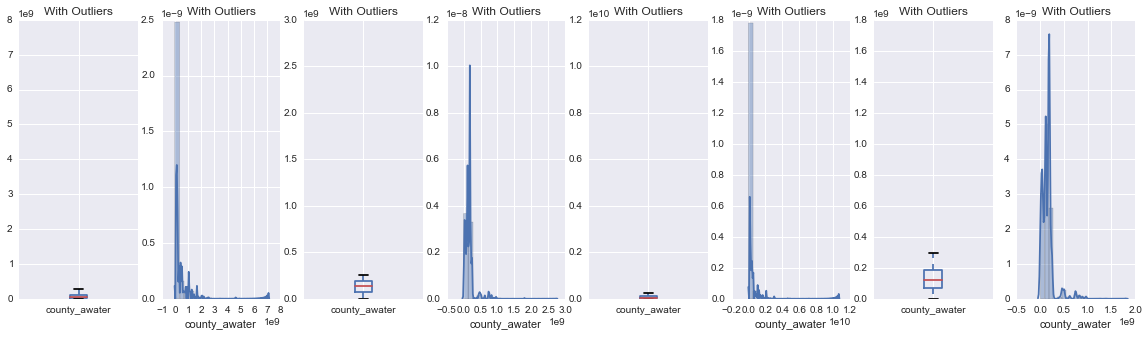

Variable: urban_areas_bool : Fires, then non-fires... Modis, then VIIRS


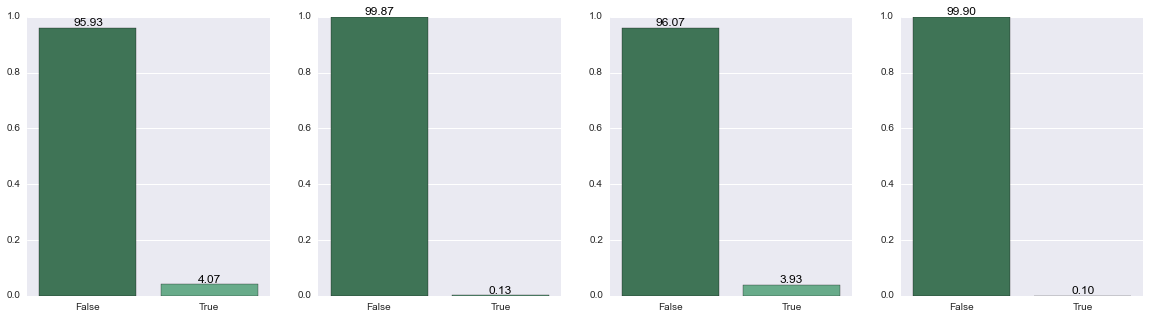

Variable: src : Fires, then non-fires... Modis, then VIIRS


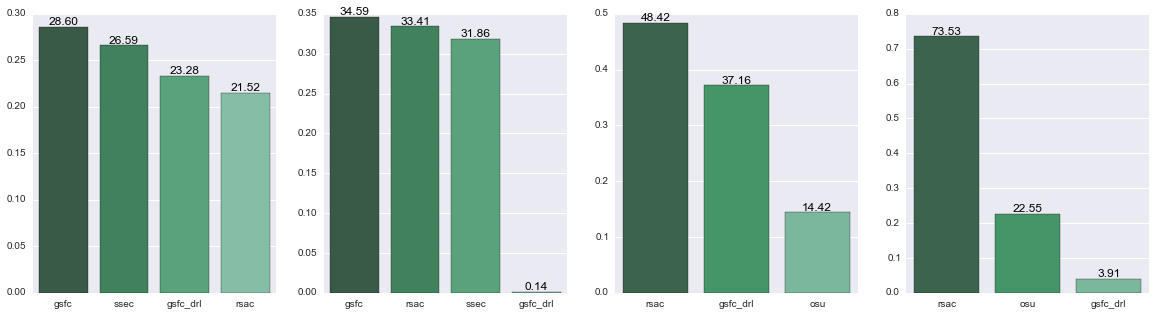

Variable: sat_src : Fires, then non-fires... Modis, then VIIRS


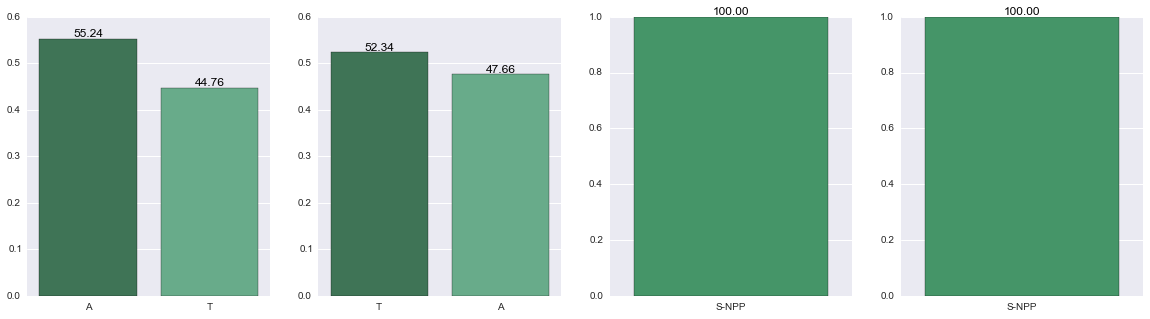

In [5]:
plot_modis_viirs(2014)

Year: 2015
--------------------------------------------------
Modis - Num. obs: 145010, Num. fires: 32873, Pct. fires: 0.22669471071
Viirs - Num. obs: 76159, Num. fires: 11345, Pct. fires: 0.148964666028
Variable: lat : Fires, then non-fires... Modis, then VIIRS


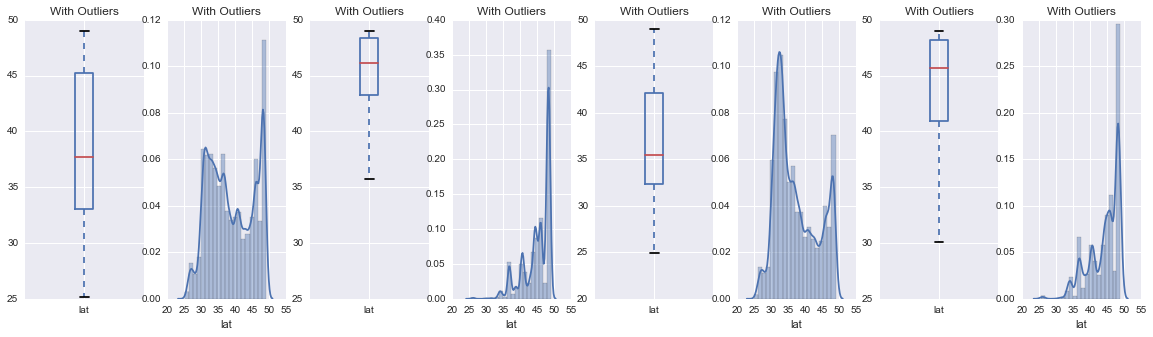

Variable: long : Fires, then non-fires... Modis, then VIIRS


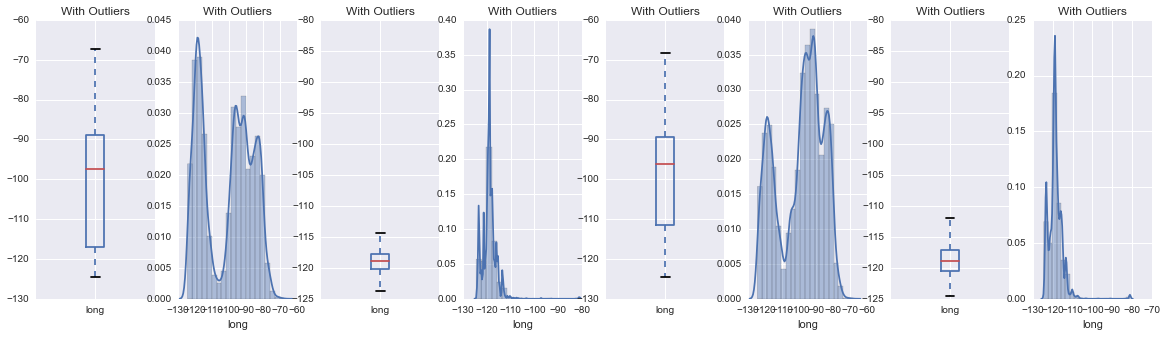

Variable: gmt : Fires, then non-fires... Modis, then VIIRS


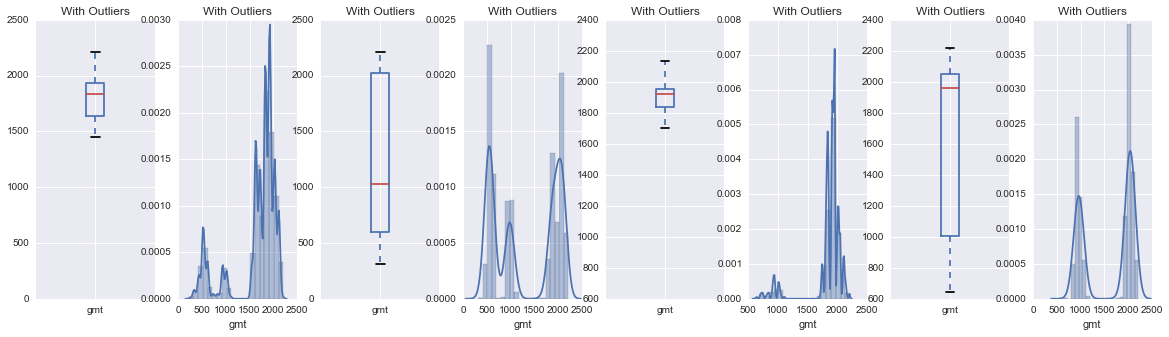

Variable: conf : Fires, then non-fires... Modis, then VIIRS


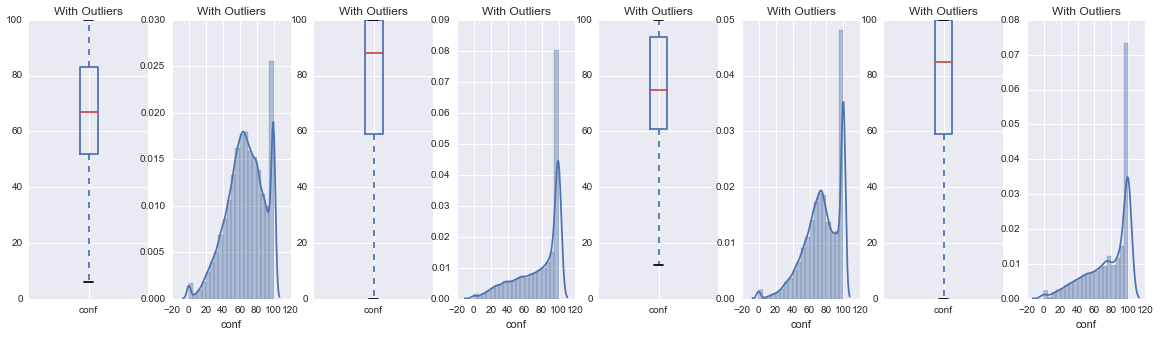

Variable: county_aland : Fires, then non-fires... Modis, then VIIRS


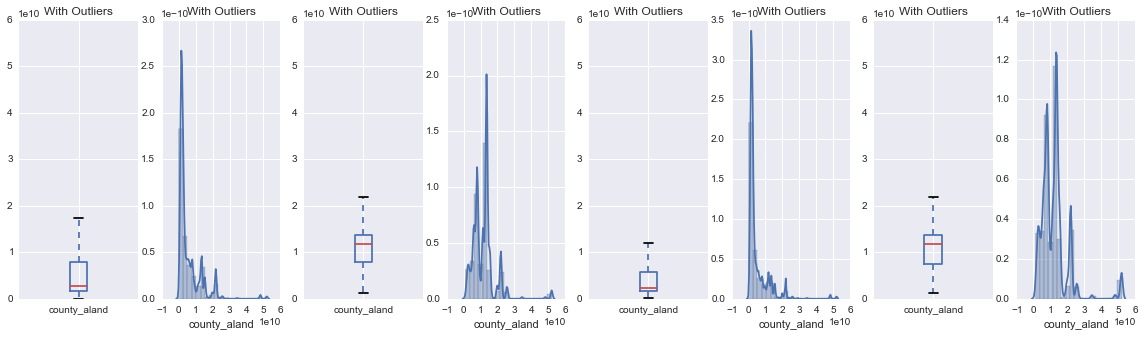

Variable: county_awater : Fires, then non-fires... Modis, then VIIRS


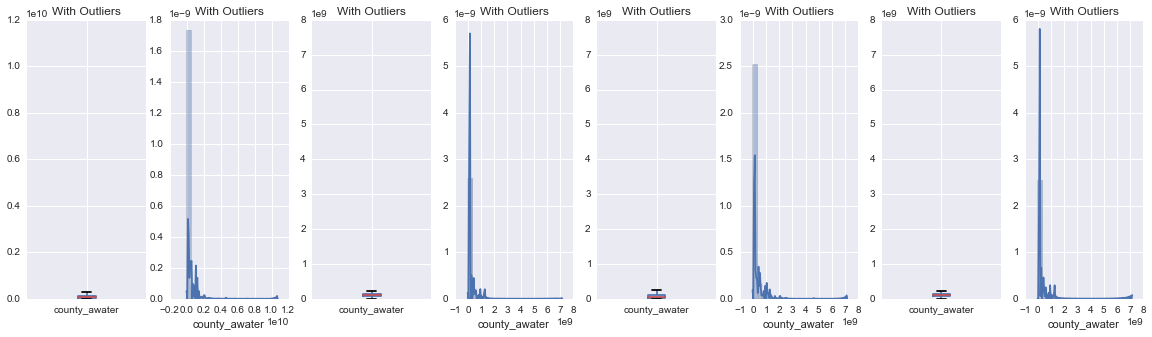

Variable: urban_areas_bool : Fires, then non-fires... Modis, then VIIRS


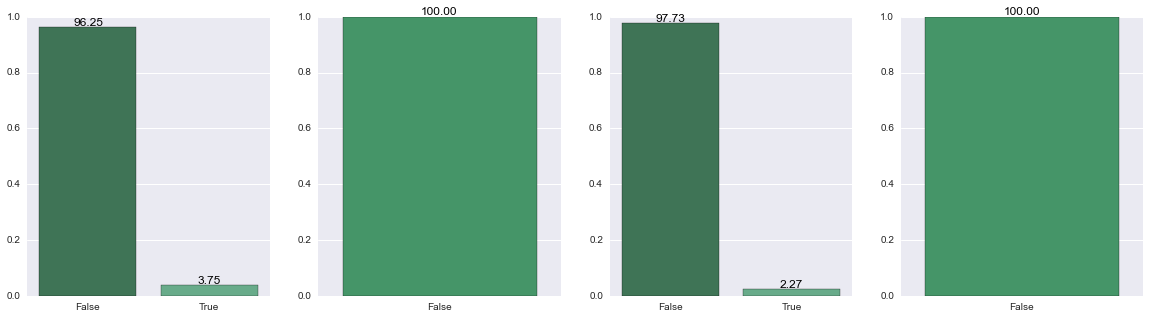

Variable: src : Fires, then non-fires... Modis, then VIIRS


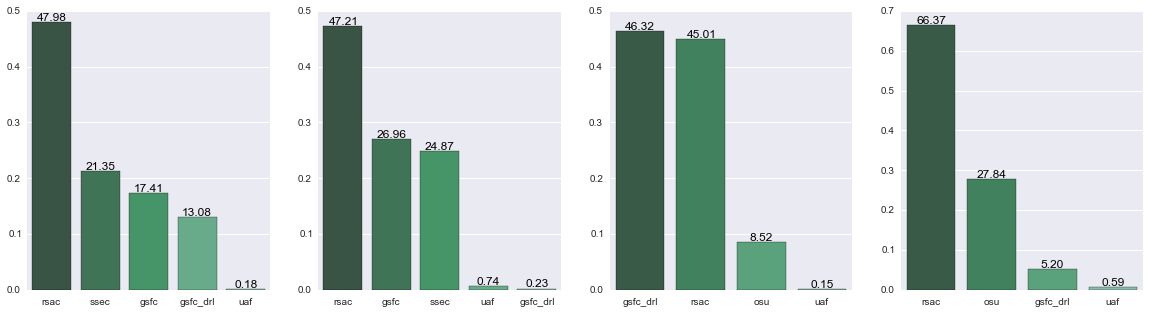

Variable: sat_src : Fires, then non-fires... Modis, then VIIRS


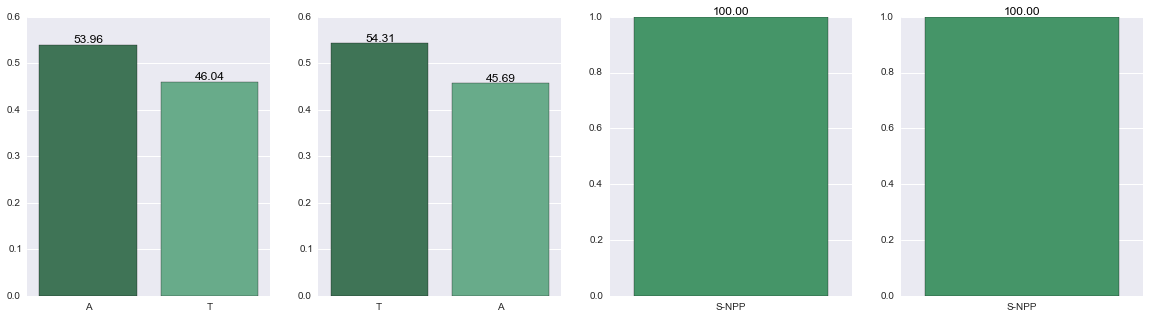

In [6]:
plot_modis_viirs(2015)